<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/SLogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
#Load the Dataset
claimants=pd.read_csv('claimants LR.csv')

In [4]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants.shape

(1340, 7)

In [6]:
claimants.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177
1339,34153,1,1.0,1.0,0.0,30.0,0.688


In [7]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [8]:
#Drop the casenum column its not required
claimants.drop(['CASENUM'],inplace=True,axis=1)

In [9]:
#Shape of the dataset
claimants.shape

(1340, 6)

In [10]:
#Removing NA values in dataset
claimants=claimants.dropna()
claimants.shape

(1096, 6)

In [11]:
#Dividing our data into input and output variables
x=claimants.iloc[:,1:]#Independant variables
y=claimants.iloc[:,0]#Dependant variable-Attorny column

In [13]:
#Logistic Regression and Fit the model
classifier=LogisticRegression()#initialize the model i.e called instance creation of class
#first create object 'classifier' for class LogisticRegression
classifier.fit(x,y)#Then use this object to fit the model.

LogisticRegression()

In [14]:
#Predict for X dataset
y_pred=classifier.predict(x)

In [15]:
y_pred #y hat values for x

array([0, 1, 1, ..., 1, 0, 1])

In [32]:
y_pred_df=pd.DataFrame({'actual':y,
                        'predicted_prob':y_pred})

In [33]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [34]:
#Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)


[[381 197]
 [123 395]]


In [35]:
((381+395)/(381+197+123+395))*100 # Accuracy

70.8029197080292

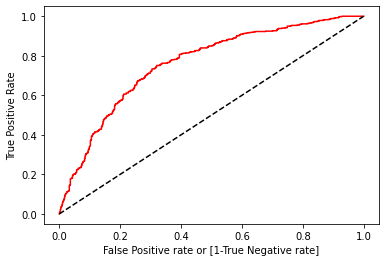

In [38]:
#ROC Curve
from sklearn.metrics import roc_curve # roc-receiver operating characteristics
from sklearn.metrics import roc_auc_score # auc- area under curve

fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) # we want to predict probability values for x data.
#here we will get false positive rate , true positive rate and threshold values
auc=roc_auc_score(y,y_pred) # Compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')# x axis range is 0 to 1 ,y axis range is 0 to 1 ,k--is line type 
plt.xlabel('False Positive rate or [1-True Negative rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [39]:
auc

0.7108589063606365